In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input/atp-matches-dataset'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

/kaggle/input/atp-matches-dataset/atp_matches_2013.csv
/kaggle/input/atp-matches-dataset/atp_matches_2002.csv
/kaggle/input/atp-matches-dataset/atp_matches_2015.csv
/kaggle/input/atp-matches-dataset/atp_matches_2005.csv
/kaggle/input/atp-matches-dataset/atp_matches_2000.csv
/kaggle/input/atp-matches-dataset/atp_matches_2011.csv
/kaggle/input/atp-matches-dataset/atp_matches_2007.csv
/kaggle/input/atp-matches-dataset/atp_matches_2004.csv
/kaggle/input/atp-matches-dataset/atp_matches_2017.csv
/kaggle/input/atp-matches-dataset/atp_matches_2012.csv
/kaggle/input/atp-matches-dataset/atp_matches_2010.csv
/kaggle/input/atp-matches-dataset/atp_matches_2009.csv
/kaggle/input/atp-matches-dataset/atp_matches_2016.csv
/kaggle/input/atp-matches-dataset/atp_matches_2008.csv
/kaggle/input/atp-matches-dataset/atp_matches_2014.csv
/kaggle/input/atp-matches-dataset/atp_matches_2003.csv
/kaggle/input/atp-matches-dataset/atp_matches_2001.csv
/kaggle/input/atp-matches-dataset/atp_matches_2006.csv


In [2]:
cols = [
    'tourney_id', # Id of Tournament
    'tourney_name', # Name of the Tournament
    'surface', # Surface of the Court (Hard, Clay, Grass)
    'draw_size', # Number of people in the tournament
    'tourney_level', # Level of the tournament (A=ATP Tour, D=Davis Cup, G=Grand Slam, M=Masters)
    'tourney_date', # Start date of tournament
    'match_num', # Match number
    'winner_id', # Id of winner
    'winner_seed', # Seed of winner
    'winner_entry', # How the winner entered the tournament
    'winner_name', # Name of winner
    'winner_hand', # Dominant hand of winner (L=Left, R=Right, U=Unknown?)
    'winner_ht', # Height in cm of winner
    'winner_ioc', # Country of winner
    'winner_age', # Age of winner
    'winner_rank', # Rank of winner
    'winner_rank_points', # Rank points of winner
    'loser_id',
    'loser_seed',
    'loser_entry',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'loser_rank',
    'loser_rank_points',
    'score', # Score
    'best_of', # Best of X number of sets
    'round', # Round
    'minutes', # Match length in minutes
    'w_ace', # Number of aces for winner
    'w_df', # Number of double faults for winner
    'w_svpt', # Number of service points played by winner
    'w_1stIn', # Number of first serves in for winner
    'w_1stWon', # Number of first serve points won for winner
    'w_2ndWon', # Number of second serve points won for winner
    'w_SvGms', # Number of service games played by winner
    'w_bpSaved', # Number of break points saved by winner
    'w_bpFaced', # Number of break points faced by winner
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]

df = pd.concat([
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2000.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2001.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2002.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2003.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2004.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2005.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2006.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2007.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2008.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2009.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2010.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2011.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2012.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2013.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2014.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2015.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2016.csv', usecols=cols),
    pd.read_csv('/kaggle/input/atp-matches-dataset/atp_matches_2017.csv', usecols=cols),
],ignore_index=True) #have to make sure that the index will not be duplicated

df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
53566,2017-M-DC-2017-WG-M-RUS-SRB-01,Davis Cup WG R1: RUS vs SRB,Hard,4.0,D,20170203.0,5.0,106421.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53567,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,1.0,106058.0,NaN,NaN,...,4.0,4.0,5.0,82.0,52.0,38.0,9.0,13.0,7.0,12.0
53568,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,2.0,104545.0,NaN,NaN,...,9.0,7.0,9.0,113.0,76.0,53.0,17.0,19.0,7.0,11.0
53569,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,4.0,105023.0,NaN,NaN,...,0.0,3.0,2.0,76.0,42.0,30.0,14.0,10.0,8.0,10.0
53570,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4.0,D,20170203.0,5.0,105449.0,NaN,NaN,...,4.0,1.0,2.0,54.0,27.0,15.0,15.0,9.0,2.0,6.0


In [3]:
roger = df.loc[(df['winner_name'] == 'Roger Federer') | (df['loser_name'] == 'Roger Federer')].copy()
#we want to analyze his performance over time but date is not float 64, so let's change it to datettime datatype.
roger.tourney_date.apply(lambda x: '%.0f' % round(x,0))
roger.loc[:,'tourney_date'] = pd.to_datetime(roger['tourney_date'], format='%Y%m%d')

# Overall Performance

([<matplotlib.patches.Wedge at 0x784332ba8450>,
 [Text(-0.9396228897751612, 0.5719342838216428, '1082 matches won'),
  Text(0.939622889775161, -0.5719342838216434, '228 matches lost')])

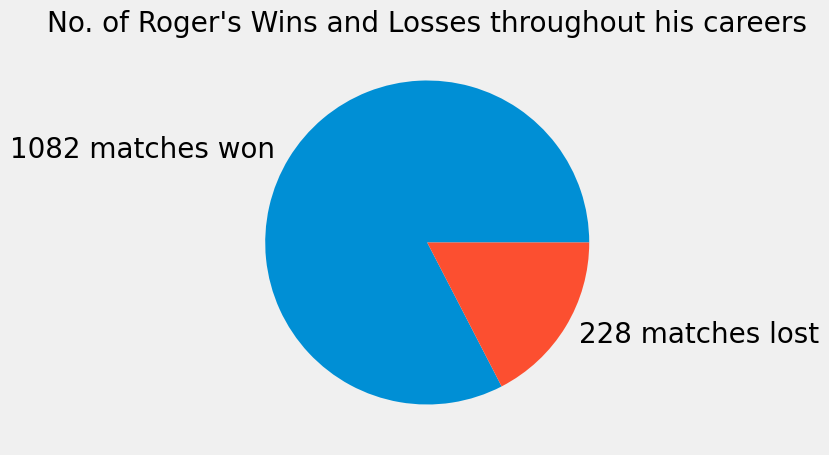

In [4]:
# Let's look at his serve performance over the time. However, we have to look at the number of serve whether it is winner or loser based on loser or winner
# how important is the serve
# let's define variable that we will use a lot
rogerwin = roger.loc[roger['winner_name'] == 'Roger Federer'].copy()
rogerloss = roger.loc[roger['loser_name'] == 'Roger Federer'].copy()
# print(f'Number of wins: {rogerwin.count()[0]}')
# print(f'Number of losses: {rogerloss.count()[0]}')
    
    #let's plot the number of wins and losses from 2000 to 
fig = plt.figure(figsize=(5,5)) 
import matplotlib as mpl

plt.title("No. of Roger's Wins and Losses throughout his careers")
plt.pie([rogerwin.count()[0],rogerloss.count()[0]],labels = [f'{rogerwin.count()[0]} matches won',f'{rogerloss.count()[0]} matches lost'],textprops={'fontsize': 20})

**What about the trend of win and loss in each year?**

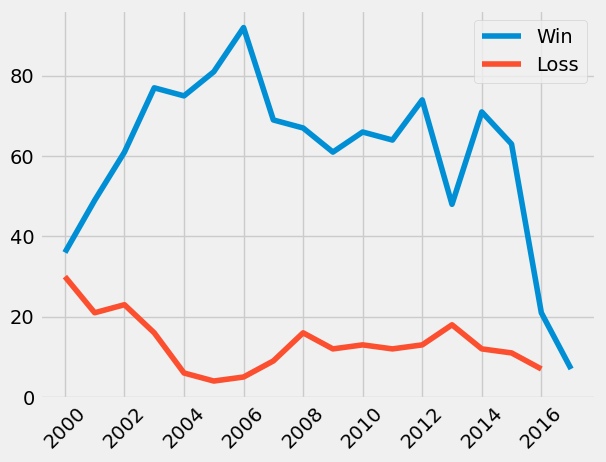

In [5]:
years = []
for i in range(0,18):
    years.append(i+2000)

annualwin = rogerwin.groupby(rogerwin.tourney_date.dt.year).count().tourney_id
annualloss = rogerloss.groupby(rogerloss.tourney_date.dt.year).count().tourney_id

plt.xticks(np.arange(2000,2017,2), rotation=45)
plt.plot(years,annualwin,label='Win')
plt.plot(years[:-1],annualloss,label='Loss')
plt.legend()
# plt.subplot(2,2,1)
# plt.bar(years[:],annualwin)

# plt.subplot(2,2,2)
# plt.bar(years[:-1],annualloss)

<BarContainer object of 10 artists>

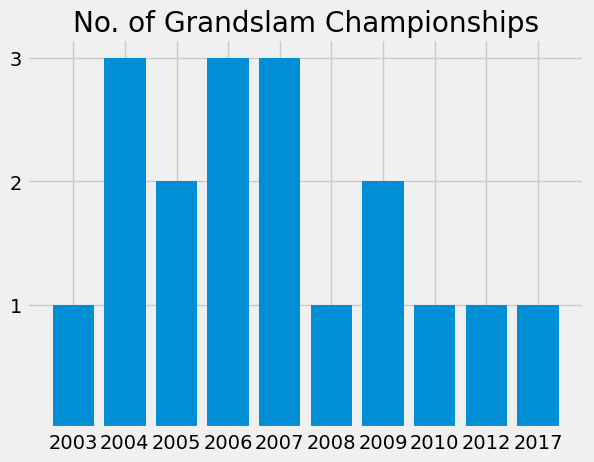

In [6]:
# Group by the tour_id where level == Grandslam
# However,l this is until 2017
tour = rogerwin.loc[rogerwin.tourney_level == 'G'].groupby(rogerwin.tourney_id).count()
championship = tour.loc[tour.tourney_id == 7]
plt.title('No. of Grandslam Championships')
plt.yticks([1,2,3])
grandslams = championship.groupby(championship.index.map(lambda x: x[0:4])).count()
plt.bar(grandslams.index,grandslams.tourney_id)

In [7]:
# Will do this later

# let's look at whether he has finished a match with fewer number of matches or not the time by looking at the number of sets overall, only when he won.
# On the other hand, did he lose more difficult? meaning does it require more sets for opponents to win over him?
# This is difficult because for grandslam, you need 3 sets to win while you only need two for mormal matches
rogerwin['No. of sets'] = rogerwin.score.map(lambda x: len(x.split(' ')) if (len(x.split(' ')) <= 5) else 5)
roger.head()
# roger.score.str.split(' ')
# roger.drop('No. of sets', axis = 1)


# average game when roger win through each year
# this number is kinda difficult to see because grand slams require 3 sets while normal tournament would be 2
# averageNoSets = roger.loc[roger.winner_name == 'Roger Federer'].groupby(roger.tourney_date.dt.year).mean()['No. of sets']
averageNoSets = roger.loc[roger.winner_name == 'Roger Federer'].groupby(roger.tourney_date.dt.year).mean()
averageNoSets.head()
# plt.plot(years,averageNoSets)

,draw_size,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
tourney_date,,,,,,,,,,,,,,,,,,,,,
2000,54.888889,29.472222,103819.0,7.000000,185.0,18.856339,46.285714,832.428571,102595.083333,4.000000,...,5.066667,5.200000,3.733333,82.533333,45.266667,31.133333,18.833333,12.666667,3.666667,6.933333
2001,62.938776,37.653061,103819.0,9.906250,185.0,19.737166,19.857143,1384.081633,102707.673469,11.090909,...,6.282609,4.413043,4.717391,89.804348,50.717391,34.521739,19.173913,13.608696,4.934783,8.630435
2002,49.442623,30.360656,103819.0,6.907407,185.0,20.834955,11.847458,1949.491525,102935.622951,8.846154,...,3.527273,3.436364,2.927273,73.036364,43.018182,28.345455,14.054545,10.909091,3.963636,7.454545
2003,53.766234,36.207792,103819.0,2.402985,185.0,21.831124,4.272727,2998.831169,103165.103896,8.666667,...,3.514706,3.161765,3.514706,75.867647,45.911765,29.176471,13.661765,11.088235,4.838235,8.558824
2004,70.293333,48.080000,103819.0,1.106061,185.0,22.817394,1.093333,5458.333333,103283.266667,10.000000,...,3.550725,3.507246,2.550725,79.782609,48.202899,31.217391,15.043478,11.942029,5.202899,9.014493


# Serve Performance

Text(0.5, 0, 'year')

<Figure size 640x480 with 0 Axes>

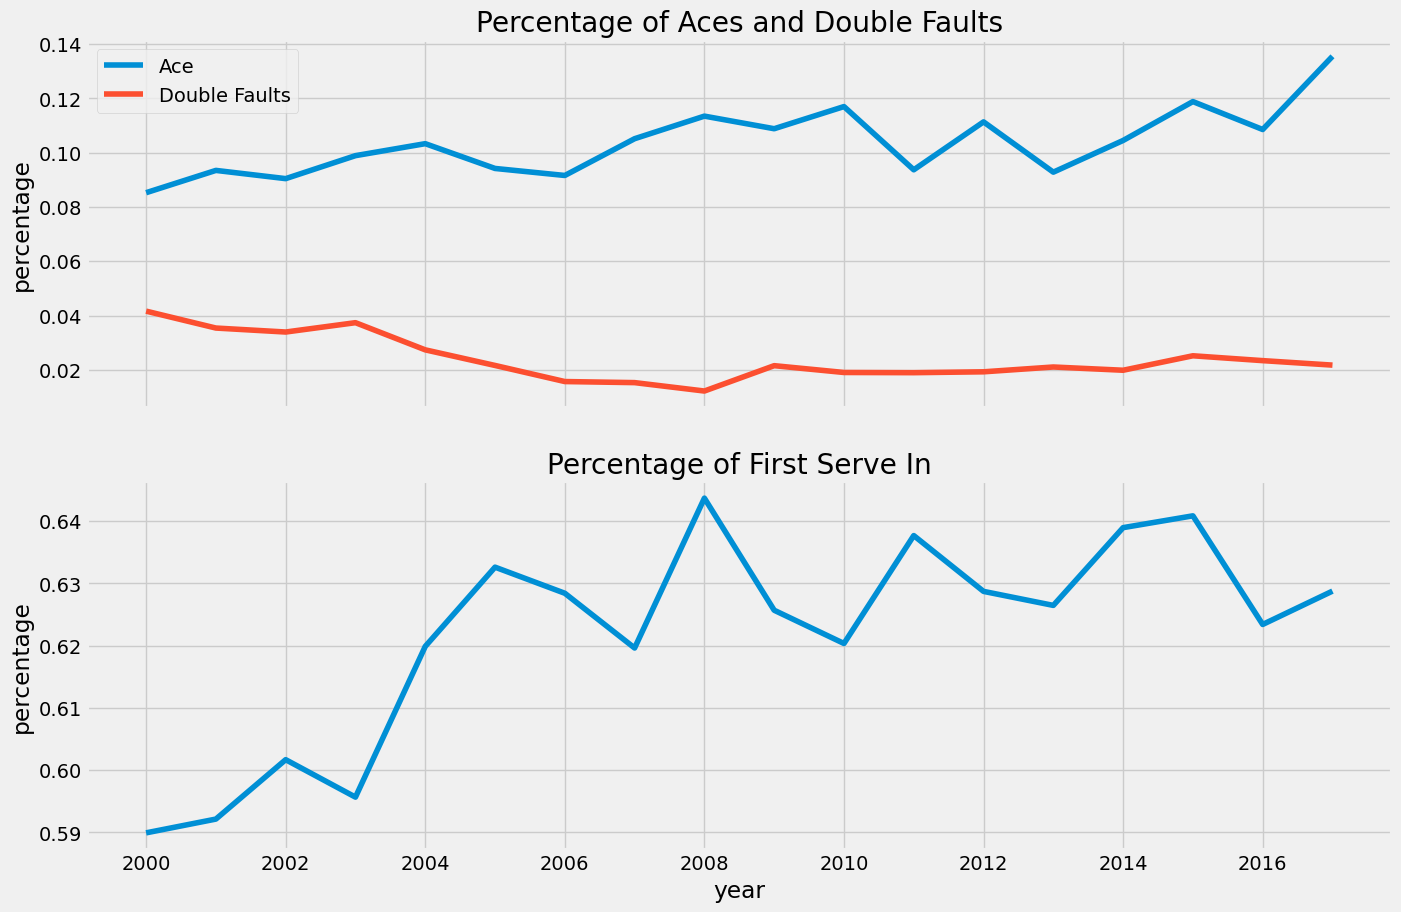

In [8]:
#let's look at his serve performance by
# 1) number of his aces/servepoints, average percentage of ace per match!
# 2) number of his double faults/servepoints
# 3) 1stin = 1st serve in

def get_aces_percent(row):
    if row['winner_name'] == 'Roger Federer':
        val = row.w_ace/row.w_svpt
    elif row['loser_name'] == 'Roger Federer':
        val = row.l_ace/row.l_svpt
    return val

def get_double_faults_percent(row):
    if row['winner_name'] == 'Roger Federer':
        val = row.w_df/row.w_svpt
    elif row['loser_name'] == 'Roger Federer':
        val = row.l_df/row.l_svpt
    return val

def get_1st_serve_in_percent(row):
    if row['winner_name'] == 'Roger Federer':
        val = row.w_1stIn/row.w_svpt
    elif row['loser_name'] == 'Roger Federer':
        val = row.l_1stIn/row.l_svpt
    return val

def get_first_serve_win_percent(row):
    if row['winner_name'] == 'Roger Federer':
        val = row.w_1stWon/row.w_svpt
    elif row['loser_name'] == 'Roger Federer':
        val = row.l_1stWon/row.l_svpt
    return val

def get_second_serve_percent(row):
    if row['winner_name'] == 'Roger Federer':
        val = row.w_2ndWon/row.w_svpt
    elif row['loser_name'] == 'Roger Federer':
        val = row.l_2ndWon/row.l_svpt
    return val



roger['roger_aces_percentage'] = roger.apply(get_aces_percent, axis=1)
roger['roger_double_faults_percentage'] = roger.apply(get_double_faults_percent, axis=1)
roger['roger_1st_serve_in_percent'] = roger.apply(get_1st_serve_in_percent, axis=1)
roger['roger_first_serve_win_percentage'] = roger.apply(get_first_serve_win_percent, axis=1)
roger['roger_second_serve_win_percentage'] = roger.apply(get_second_serve_percent, axis=1)

#group by year
groupbyyear = roger.groupby(roger.tourney_date.dt.year).mean()


fig = plt.figure()
fig, (ax1,ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True
)

fig.set_size_inches(15,10)
fig.subplots_adjust(wspace=0.5)

ax1.set_title('Percentage of Aces and Double Faults')

ax1.set_ylabel('percentage')
ax1.set_xticks(np.arange(2000,2017,2))
ax1.plot(groupbyyear.index,groupbyyear['roger_aces_percentage'], label='Ace')
ax1.plot(groupbyyear.index,groupbyyear['roger_double_faults_percentage'],label='Double Faults')
ax1.legend()

ax2.plot(groupbyyear.index,groupbyyear['roger_1st_serve_in_percent'])
ax2.set_ylabel('percentage')
ax2.set_title('Percentage of First Serve In')
ax2.set_xlabel('year')

# groupbyyear = roger.groupby(roger.tourney_date.dt.year).sum()
# groupbyyear

# Roger's mentality over the time

In [9]:
# Now I jsut realized that I should make a new variable that has all the info when Roger won and when he lost.
roger_win = roger.loc[roger.winner_name == 'Roger Federer', :]
roger_loss = roger.loc[roger.loser_name == 'Roger Federer', :]

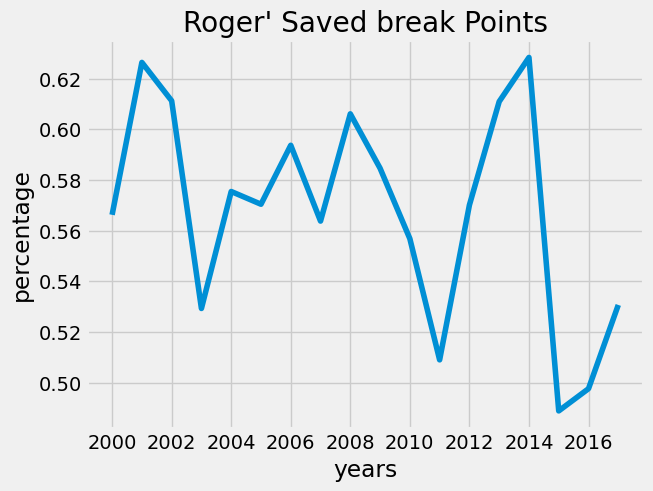

In [10]:
def get_breakpoint_saved_percent(row):
    if row['winner_name'] == 'Roger Federer':
        if row.w_bpFaced != 0:
            val = row.w_bpSaved/row.w_bpFaced
        else:
            val = 0
    elif row['loser_name'] == 'Roger Federer':
        if row.l_bpFaced != 0:
            val = row.l_bpSaved/row.l_bpFaced
        else:
            val = 0
    return val

roger['roger_breakpoint_saved_percent'] = roger.apply(get_breakpoint_saved_percent, axis=1)

mental_level = roger.groupby(roger['tourney_date'].dt.year).mean().roger_breakpoint_saved_percent
mental_level


plt.title("Roger' Saved break Points")
plt.xlabel('years')
plt.ylabel('percentage')
plt.xticks(np.arange(2000,2017,2))
# plt.plot(np.arange(2000,2018),mental_level)
plt.plot(years,mental_level)

# Roger's opponents throughout the year

In [11]:
loss = roger.loc[roger.winner_name != 'Roger Federer', ['winner_name']]
# loss.rename(r={'winner_name': 'name'})
loss.columns = ['name']
loss['status'] = 'loss'
win = roger.loc[roger.winner_name == 'Roger Federer', ['loser_name']]
win.columns = ['name']
win['status'] = 'win'
opponents = pd.concat([win,loss])
# opponents
opponents.groupby('name').count().sort_values('status', ascending = False)

,status
name,
Novak Djokovic,46
Rafael Nadal,35
Lleyton Hewitt,26
Andy Murray,25
Andy Roddick,24
...,...
Bobby Reynolds,1
Noah Rubin,1
Nikoloz Basilashvili,1


Text(0.5, 1.0, "Roger's head-to-head against his opponents")

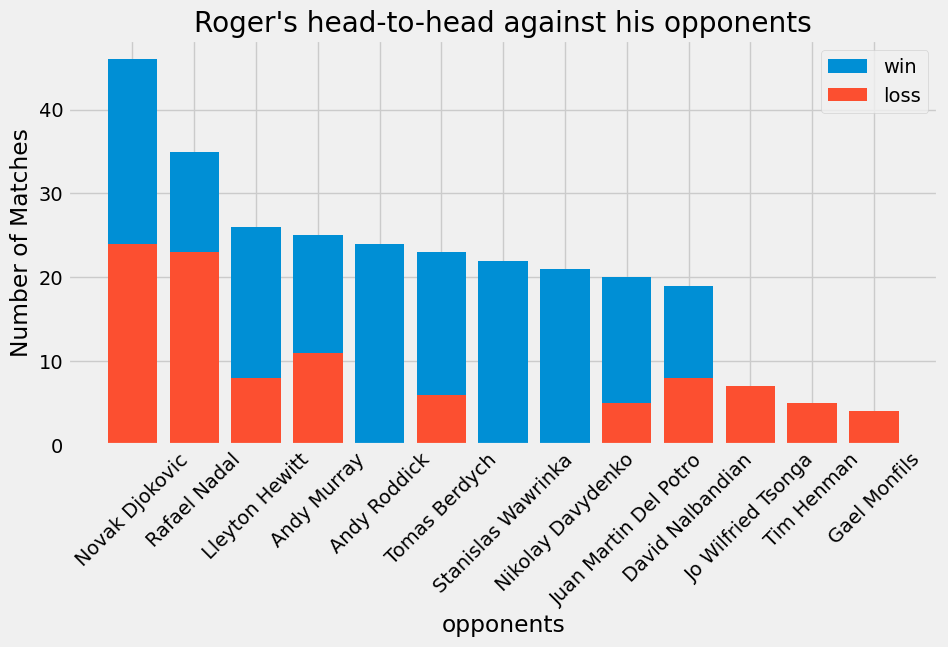

In [12]:
numberofmatches = opponents.groupby('name').count().sort_values('status', ascending = False)

numberoflosses = opponents.loc[opponents.status == 'loss', :].groupby('name').count().sort_values('status', ascending = False)

fig = plt.figure(figsize=(10,5))

plt.xticks(rotation=45)
plt.xlabel('opponents')
plt.ylabel('Number of Matches')


plt.bar(numberofmatches.index[0:10],numberofmatches.status[0:10], label='win')
plt.bar(numberoflosses.index[0:10],numberoflosses.status[0:10], label='loss')
plt.legend()
plt.title("Roger's head-to-head against his opponents")

In [13]:
opponents_grouped = pd.DataFrame()
opponents_grouped['No. of matches'] = numberofmatches.status
opponents_grouped['No. of winning'] = opponents.loc[opponents.status=='win'].groupby('name').count().status
opponents_grouped['percentage'] = opponents_grouped['No. of winning']/opponents_grouped['No. of matches']
opponents_grouped.loc[opponents_grouped['No. of matches'] > 10].sort_values('percentage',ascending = True).head()

,No. of matches,No. of winning,percentage
name,,,
Rafael Nadal,35,12.0,0.342857
Novak Djokovic,46,22.0,0.478261
Andy Murray,25,14.0,0.560000
David Nalbandian,19,11.0,0.578947
Tim Henman,12,7.0,0.583333


Text(0.5, 1.0, "Roger's Strongest Opponents")

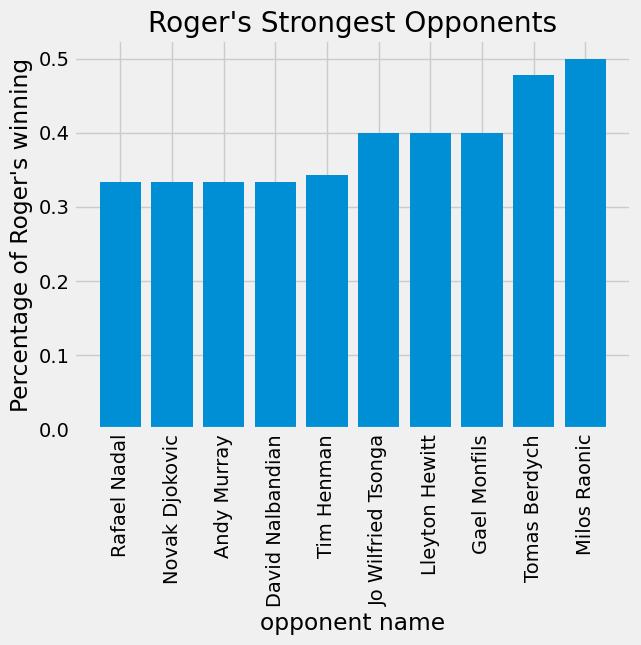

In [14]:
opponents.loc[opponents.status=='win'].groupby('name').count()
plt.xlabel('opponent name')
plt.ylabel("Percentage of Roger's winning")
plt.xticks(rotation='vertical')
# plt.bar(opponents_grouped.sort_values('percentage',ascending = True).index[0:10], opponents_grouped.sort_values('percentage',ascending = True).percentage[0:10])

plt.bar(opponents_grouped.loc[opponents_grouped['No. of matches'] > 10].sort_values('percentage',ascending = True).index[0:10], opponents_grouped.sort_values('percentage',ascending = True).percentage[0:10])
plt.title("Roger's Strongest Opponents")